In [21]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import array as arr
import seaborn as sns
import random
import pylab
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import inverse_method_funs as inv

In [22]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [61]:
def run_IIM(fname_sv, fname_sim, meansv=True):

    # Load wideband frequency reponse curves
    freqs_EV, sv = inv.read_widebandfrequencyresponse(fname_EV, extracols = 0)
    sv = np.array(sv,dtype=float) # Convert
    freqs_EV = np.array(freqs_EV,dtype=float)

    #Load simulations and mean backscatter
    specs, freqs_sim, sig_bs_mean = inv.read_scatteringmodelsimulations(fname_sim, nsim=1000, ve=True)


    # Resample to line up frequency sampling
    sigbs_mean = np.zeros([len(freqs_EV),len(specs)])
    for ind_spec in range(0,len(specs)):
        f = UnivariateSpline(freqs_sim,sig_bs_mean[:, ind_spec], k=5)
        sigbs_mean[:,ind_spec] = f(freqs_EV)

    # Run least squares (non-negative)
    if meansv:
        sv_smooth, ci = inv.sv_smooth_ci(sv, N=30)
        d = optimize.lsq_linear(sigbs_mean, sv_smooth, bounds=(0,np.inf))
        density = d.x
    else:
        density = np.zeros([np.shape(sigbs_mean)[1], np.shape(sv)[1]])
        sigbs = sigbs_mean
        for ind in range(0, np.shape(sv)[1]):
            d = optimize.lsq_linear(sigbs, sv[:,ind], bounds=(0,np.inf))
            density[:,ind] = d.x


    return density, specs

In [128]:
def plot_IIM(specs, density, fname_image=False):
    if fname_image:
        img = mpimg.imread(fname_image)
        fig, ax = plt.subplots(1,2, figsize=(10,4))
        imgplot = ax[0].imshow(img)
        ax[0].grid(False)
        ax[0].axis('off')
        
        plt.plot(specs,density)
    else:
        plt.plot(specs,density)
        

## Strong scatterer

Determine files

In [129]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_24_strong23.csv'
fname_im = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_24_strong23.png'
fname_sim = '../ZooScatStuff/my_simplified_data.feather'

Run scripts

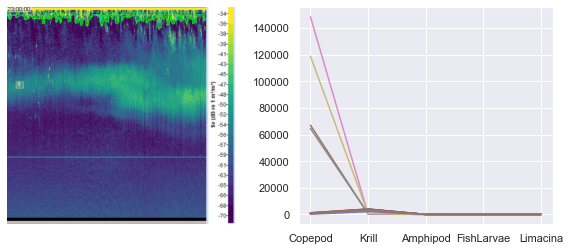

In [130]:
density, specs = run_IIM(fname_EV,fname_sim, meansv=False)
plot_IIM(specs,density, fname_image=fname_im)

## Active layer

In [131]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_24_2130.csv'
fname_im = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_24_2130.png'

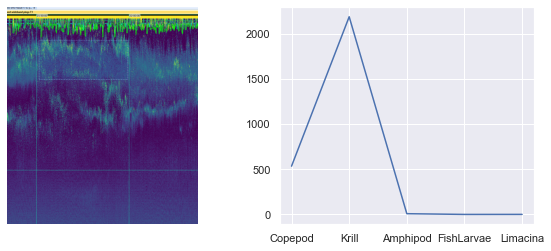

In [132]:
density, specs = run_IIM(fname_EV,fname_sim, meansv=True)
plot_IIM(specs,density, fname_image=fname_im)

## More active layer

In [133]:
fname_EV = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM-1030.csv'
fname_im = 'D:/GLIDER2018/Echosounder/EVexport/Wideband_frequency_response_28AM.png'

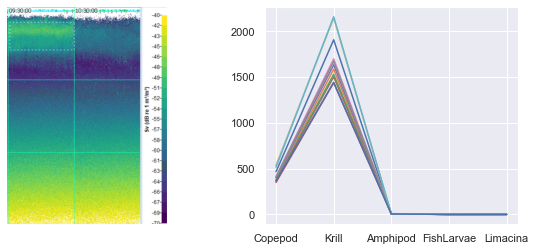

In [134]:
density, specs = run_IIM(fname_EV,fname_sim, meansv=False)
plot_IIM(specs,density, fname_image=fname_im)